In [34]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read dataset
df=pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
#checking for datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Get basic idea of data using describe()
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#checking for null values in dataset

count=df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# checking for row wise null values
round((df.isnull().sum(axis=1)/122)*100,2).sort_values(ascending=False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

Inference:

1.From the dataset, its clearly visible that all features have 730 non-null values and there are 16 such columns. cnt is the target variable. Next thing to focus is which features will be relevant for our model and which ones to remove. 

2.Instant and dteday are the columns which can be dropped as mnth,yr,weekday are there already and instant field is not a relevant field for our model.

3.Holiday feature can also be dropped because workingday feature explains the exact same thing.

In [10]:
# dropping the columns
df = df.drop(['instant','dteday','holiday'],axis = 1)
df.head()


,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#from data we can see that: season,yr,mnth,weekday,workingday,weathersit all are categorical variables
#We will replace season,weekday,mnth and weathersit with appropriate values

In [12]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head(10)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,1,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,1,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,1,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,1,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,1,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [13]:
df['weathersit'].replace({1:"Clear",2:"Mist_cloudy",3:"Light rain_snow_Thunderstorm",4:'Heavy Rain'},inplace=True)
df.head(10)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,1,6,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,1,0,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,1,1,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,1,2,1,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,1,3,1,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [14]:
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head(10)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,1,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,1,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,1,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,1,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,1,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [16]:
df['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
df.head(10)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,Jan,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,Jan,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,Jan,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,Jan,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,Jan,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [17]:
#Performing EDA

#PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

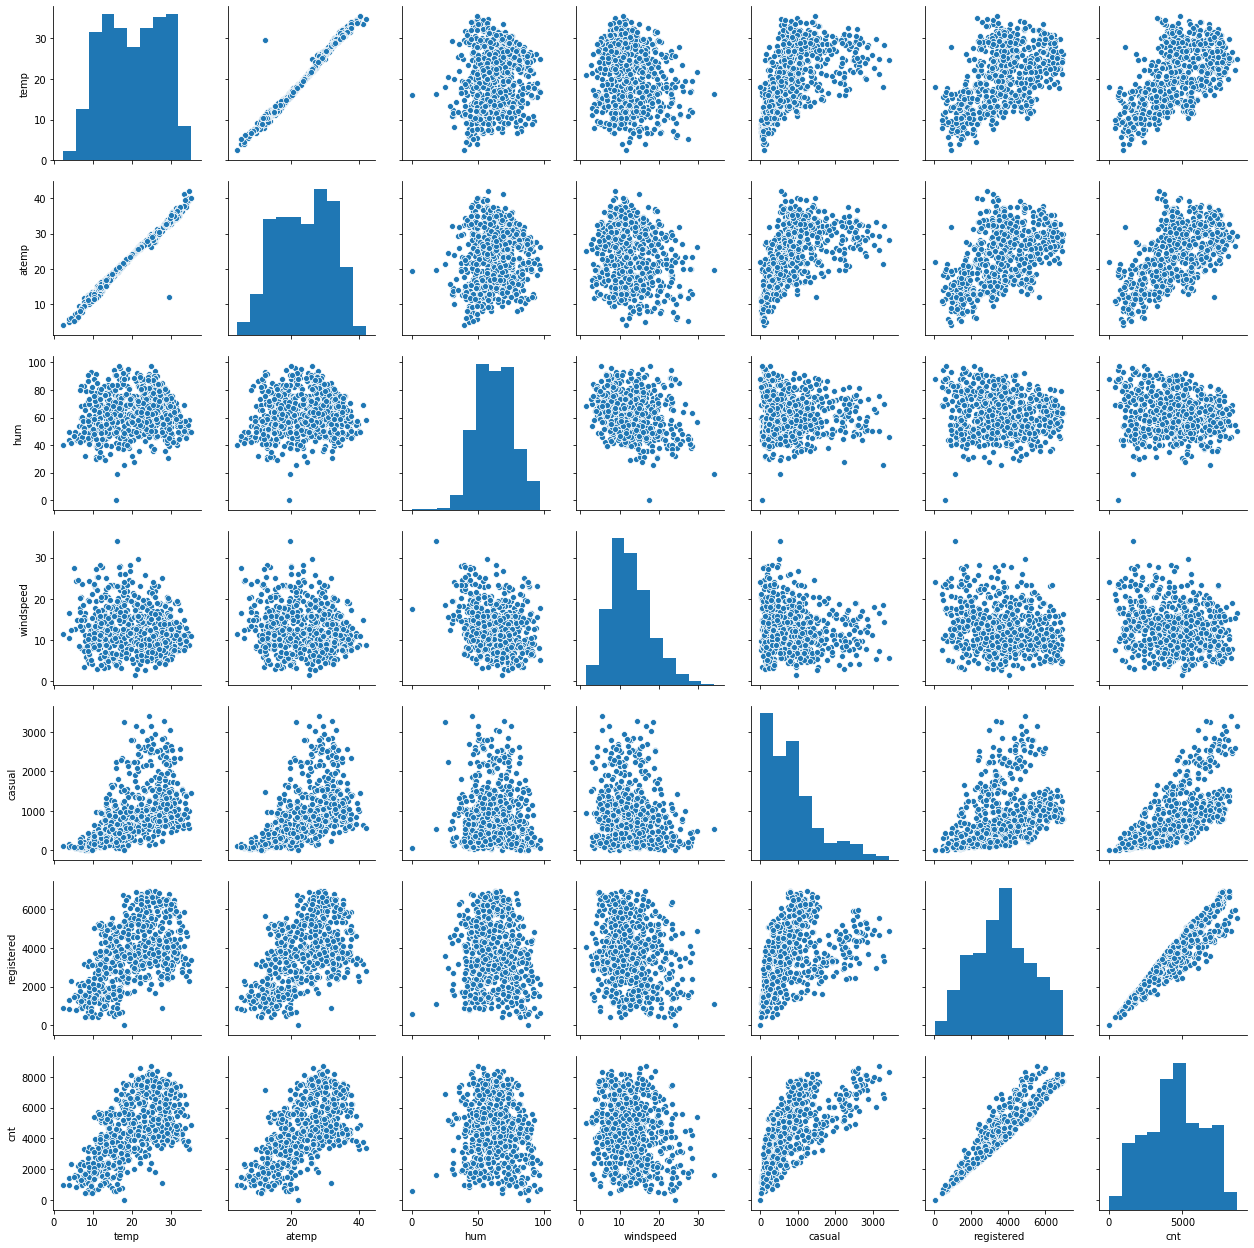

In [18]:
sns.pairplot(df, vars=['temp','atemp','hum','windspeed','casual','registered','cnt'])
plt.show()

Inference:

When Comparing cnt, temp, atemp, casual and registered show linear increase. While, hum and windspeed has datapoints scattered.

temp and atemp are highly corellated which can lead to multicollinearity.

cnt is highly corellated with registered.

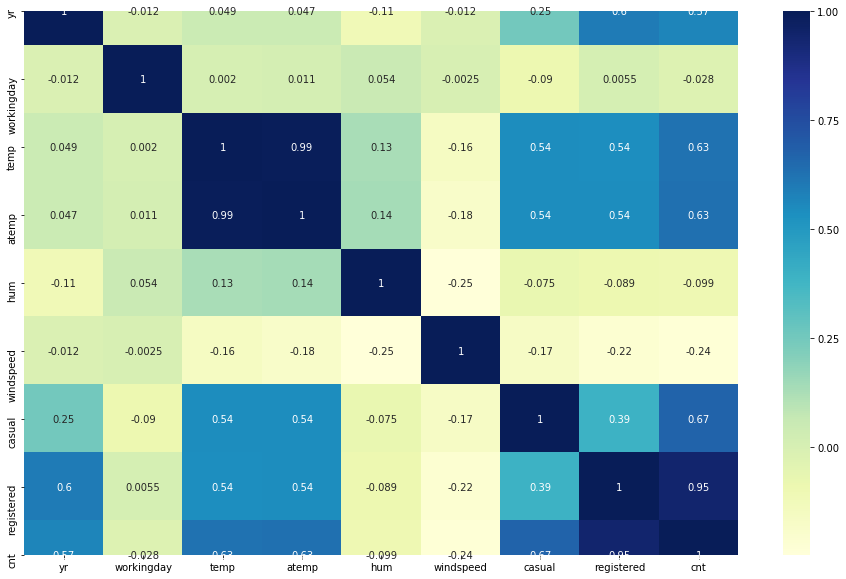

In [19]:
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()


Inference:
From the heatmap, it is clear that atemp is highly correlated with temp and same is the case with cnt and registered. This may lead to multicollinearity. So, solution is to drop the features.

In [20]:
# Dropping the features registered and atemp
df.drop(['atemp','registered','casual'],axis=1,inplace=True)

In [21]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,Monday,1,Mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,Tuesday,1,Mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600


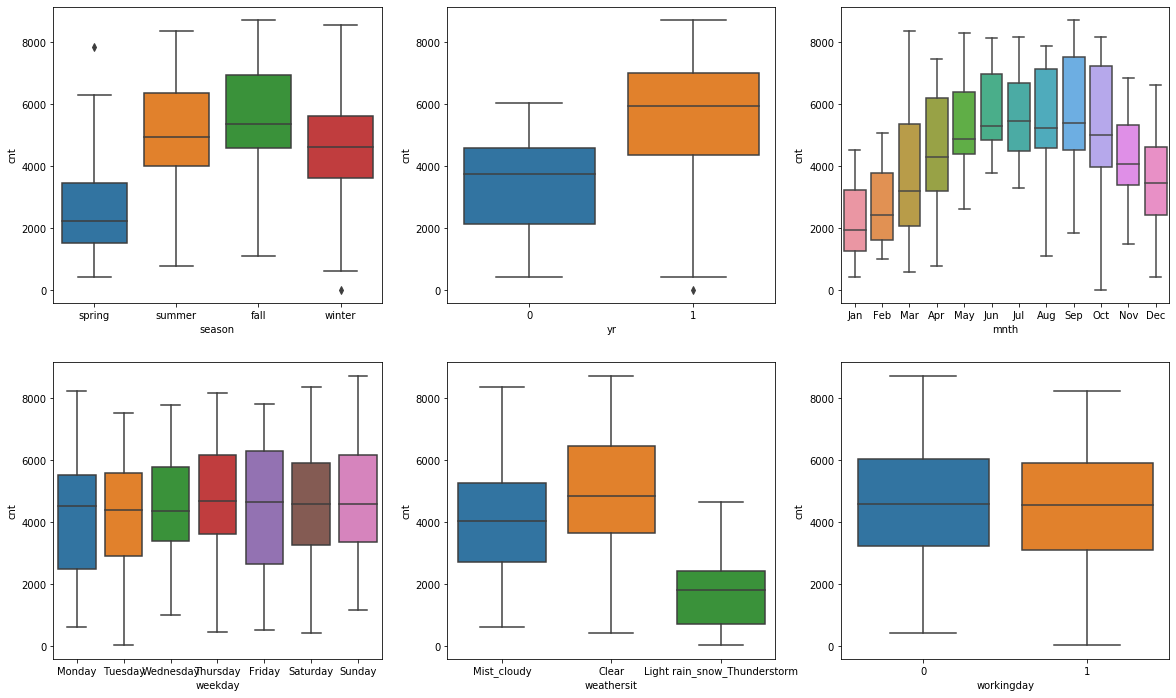

In [23]:
# Categorical Variables mapping
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='weathersit', y='cnt',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt',data=df)
plt.show()

# Creating dummy variables

In [25]:
# Creating Dummy Variables
weather= pd.get_dummies(df['weathersit'],drop_first=True)
seasons = pd.get_dummies(df['season'],drop_first=True)
month= pd.get_dummies(df['mnth'],drop_first=True)
week_day= pd.get_dummies(df['weekday'],drop_first=True)

In [27]:
df_dummy= pd.concat([df,seasons,weather,month,week_day],axis=1)
df_dummy.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,Monday,1,Mist_cloudy,14.110847,80.5833,10.749882,985,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,Tuesday,1,Mist_cloudy,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# dropping unwanted columns
df_dummy.drop(['weekday','weathersit','mnth','season'],axis=1,inplace=True)

In [29]:
df_dummy.shape

(730, 28)

In [30]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
yr                              730 non-null int64
workingday                      730 non-null int64
temp                            730 non-null float64
hum                             730 non-null float64
windspeed                       730 non-null float64
cnt                             730 non-null int64
spring                          730 non-null uint8
summer                          730 non-null uint8
winter                          730 non-null uint8
Light rain_snow_Thunderstorm    730 non-null uint8
Mist_cloudy                     730 non-null uint8
Aug                             730 non-null uint8
Dec                             730 non-null uint8
Feb                             730 non-null uint8
Jan                             730 non-null uint8
Jul                             730 non-null uint8
Jun                             730 non-null uint8
Mar                   

In [31]:
df_dummy.describe()

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light rain_snow_Thunderstorm,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.690411,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.028767,...,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466
std,0.500343,0.462641,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.167266,...,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767
min,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df_dummy.head(10)

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light rain_snow_Thunderstorm,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,8.378268,51.8261,6.000868,1606,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,8.057402,49.8696,11.304642,1510,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,1,6.765000,53.5833,17.875868,959,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,1,5.671653,43.4167,24.250650,822,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,1,6.184153,48.2917,14.958889,1321,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Training the Model

In [35]:
df_train, df_test = train_test_split(df_dummy, train_size = 0.7,  random_state = 100)

In [37]:
df_train.shape


(510, 28)

In [38]:
df_test.shape

(220, 28)

In [39]:
# Next step will be to rescale some of the numerical values using the min-max scaling method
scaler = MinMaxScaler()

# Create list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']

# fit on data 
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light rain_snow_Thunderstorm,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
111,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
# Data Preparation
X_train = df_train.drop('cnt', axis=1)
y_train = df_train.cnt

In [41]:
# Running RFE first 10 features 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
# Displaying the columns and their rankings training the model 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', False, 4),
 ('Light rain_snow_Thunderstorm', True, 1),
 ('Mist_cloudy', False, 2),
 ('Aug', False, 13),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 18),
 ('May', False, 12),
 ('Nov', False, 7),
 ('Oct', False, 16),
 ('Sep', False, 3),
 ('Monday', False, 11),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 17),
 ('Tuesday', False, 10),
 ('Wednesday', False, 14)]

In [46]:
# Will take all the columns with rank 1
rfe_col = ['yr','temp','hum','windspeed','spring','winter','Light rain_snow_Thunderstorm','Mist_cloudy','Jul','Sep']
X_train_rfe = X_train[rfe_col]

In [47]:
X_train_rfe.head()

,yr,temp,hum,windspeed,spring,winter,Light rain_snow_Thunderstorm,Mist_cloudy,Jul,Sep
576,1,0.815169,0.725633,0.264686,0,0,0,0,1,0
426,1,0.442393,0.640189,0.255342,1,0,0,1,0,0
728,1,0.245101,0.498067,0.663106,1,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0,0,0,1,0,0
111,0,0.345824,0.751824,0.380981,0,0,0,1,0,0


In [48]:
X_train_sm = sm.add_constant(X_train_rfe)
# create first model
lr= sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          5.89e-187
Time:                        17:45:08   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3379      0.032     10.685      0.000       0.276       0.400
yr                               0.2308      0.008     27.719      0.000       0.214       0.247
temp                             0.4811      0.031     15.320      0.000       0.419       0.543
hum                             -0.1604      0.039     -4.163      0.000      -0.236      -0.085
windspeed                       -0.1719      0.026     -6.571      0.000      -0.223      -0.120
spring                          -0.1110      0.015     -7.291      0.000      -0.141      -0.081
winter                           0.0519      0.013      4.111      0.000       0.027       0.077
Light rain_snow_Thunderstorm    -0.2375      0.027     -8.809      0.000      -0.291      -0.185
Mist_cloudy                     -0.0523      0.011     -4.873      0.000      -0.073      -0.031
Jul                             -0.0796      0.018     -4.538      0.000      -0.114      -0.045
Sep                              0.0570      0.016      3.602      0.000       0.026       0.088
==============================================================================
Omnibus:                       66.845   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.248
Skew:                          -0.655   Prob(JB):                     5.35e-39
Kurtosis:                       5.565   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF Calculation


In [49]:
# create a dataframe  that will contain the names of all the feature variables and their respective vif
X_train_sm1 = X_train_sm.drop('const',axis=1)
vif=pd.DataFrame()
vif['features']= X_train_sm1.columns
vif['VIF']= [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
2,hum,22.38
1,temp,15.29
3,windspeed,4.02
4,spring,2.53
7,Mist_cloudy,2.23
5,winter,2.07
0,yr,2.06
8,Jul,1.40
6,Light rain_snow_Thunderstorm,1.20
9,Sep,1.20


In [51]:
X_train_sm2 = sm.add_constant(X_train_sm1)
# create second model
lr2= sm.OLS(y_train, X_train_sm2)

lr_model = lr2.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     266.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.70e-184
Time:                        17:50:59   Log-Likelihood:                 487.07
No. Observations:                 510   AIC:                            -954.1
Df Residuals:                     500   BIC:                            -911.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2515      0.024     10.372      0.000       0.204       0.299
yr                               0.2346      0.008     27.901      0.000       0.218       0.251
temp                             0.4504      0.031     14.520      0.000       0.389       0.511
windspeed                       -0.1412      0.026     -5.535      0.000      -0.191      -0.091
spring                          -0.1151      0.015     -7.456      0.000      -0.145      -0.085
winter                           0.0420      0.013      3.333      0.001       0.017       0.067
Light rain_snow_Thunderstorm    -0.2813      0.025    -11.146      0.000      -0.331      -0.232
Mist_cloudy                     -0.0779      0.009     -8.721      0.000      -0.096      -0.060
Jul                             -0.0720      0.018     -4.063      0.000      -0.107      -0.037
Sep                              0.0536      0.016      3.338      0.001       0.022       0.085
==============================================================================
Omnibus:                       68.373   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.818
Skew:                          -0.681   Prob(JB):                     1.80e-38
Kurtosis:                       5.514   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# create a dataframe  that will contain the names of all the feature variables and their respective vif
X_train_sm2 = X_train_sm2.drop('const',axis=1)
vif=pd.DataFrame()
vif['features']= X_train_sm2.columns
vif['VIF']= [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
1,temp,4.61
2,windspeed,4.00
0,yr,2.06
3,spring,1.63
6,Mist_cloudy,1.51
4,winter,1.38
7,Jul,1.35
8,Sep,1.20
5,Light rain_snow_Thunderstorm,1.08


In [53]:
# Predicting y_train 
X_train_sm2 = sm.add_constant(X_train_sm2)
y_train_pred = lr_model.predict(X_train_sm2)

# R-Squared Value for Training Data

In [54]:
r2_score(y_train, y_train_pred)

0.8275326850505755

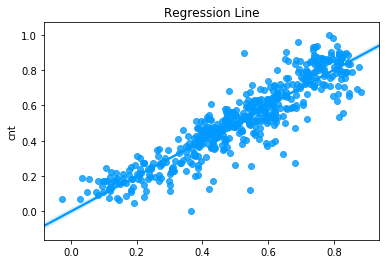

In [55]:
sns.regplot(y_train_pred,y_train,color = '#0099ff').set_title('Regression Line')
plt.show()

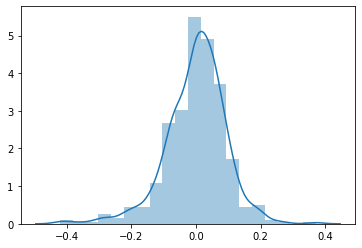

In [56]:
# Plotting Error Terms
sns.distplot((y_train - y_train_pred), bins = 20)
plt.show()


Applying the model on Test Data

In [57]:
# Create list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']
# fit on data 
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light rain_snow_Thunderstorm,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [60]:
# Data Preparation
rfe_col = ['yr','temp','hum','windspeed','spring','winter','Light rain_snow_Thunderstorm','Mist_cloudy','Jul','Sep']

X_test = df_test[rfe_col]
X_test = X_test.drop(['hum'], axis=1)
y_test = df_test.cnt
X_test.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'winter',
       'Light rain_snow_Thunderstorm', 'Mist_cloudy', 'Jul', 'Sep'],
      dtype='object')

In [61]:
# predict the test data
X_test_sm = sm.add_constant(X_test)

lr2= sm.OLS(y_test, X_test_sm)

lr_model = lr2.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     104.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           1.24e-72
Time:                        17:59:23   Log-Likelihood:                 209.58
No. Observations:                 220   AIC:                            -399.2
Df Residuals:                     210   BIC:                            -365.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2386      0.039      6.043      0.000       0.161       0.316
yr                               0.2422      0.013     18.509      0.000       0.216       0.268
temp                             0.4193      0.050      8.419      0.000       0.321       0.517
windspeed                       -0.0384      0.043     -0.884      0.378      -0.124       0.047
spring                          -0.1503      0.025     -5.983      0.000      -0.200      -0.101
winter                           0.0556      0.020      2.721      0.007       0.015       0.096
Light rain_snow_Thunderstorm    -0.2407      0.041     -5.825      0.000      -0.322      -0.159
Mist_cloudy                     -0.0667      0.014     -4.730      0.000      -0.094      -0.039
Jul                             -0.0512      0.025     -2.058      0.041      -0.100      -0.002
Sep                              0.0337      0.024      1.398      0.164      -0.014       0.081
==============================================================================
Omnibus:                       25.722   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.195
Skew:                          -0.778   Prob(JB):                     6.19e-08
Kurtosis:                       4.096   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
y_test_pred = lr_model.predict(X_test_sm)

# R-Squared Value for Test Data

In [63]:
r2_score(y_test, y_test_pred)

0.8178079819435081

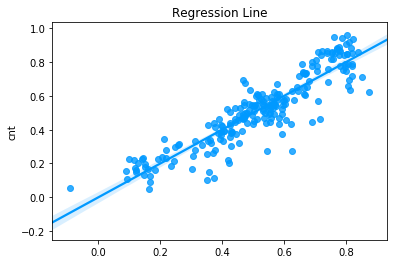

In [64]:
sns.regplot(y_test_pred,y_test,color = '#0099ff').set_title('Regression Line')
plt.show()